In [ ]:
from ctypes import sizeof
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [ ]:
import os

# Step 1: Get all file names and their labels
def get_file_names_with_labels(directory):
    file_names = []
    labels = []

    # Loop through each folder in the directory
    for i in os.listdir(directory):
        label_directory = os.path.join(directory, i)

        # Check if it's a directory
        if os.path.isdir(label_directory):
            # Loop through each file in the folder
            for file_name in os.listdir(label_directory):
                # Check if the file is a CSV file
                if file_name.endswith('.csv'):
                    file_names.append(file_name)
                    label = file_name.split('_')[0]  # Extract the label before the first underscore
                    labels.append(label)

    return file_names, labels

# Example usage:
directory = '/Users/loriyaharsh/Desktop/HARSH/SAME_6/ML/project/code_and_datasets/sptio-temporal-dataset/dataset'

file_names, labels = get_file_names_with_labels(directory)

# Print file names and their corresponding labels
for file_name, label in zip(file_names, labels):
    print("File:", file_name, "Label:", label)

File: normal_10_15.csv Label: normal
File: normal_12_132.csv Label: normal
File: normal_10_29.csv Label: normal
File: normal_12_126.csv Label: normal
File: abnormal_12_11.csv Label: abnormal
File: abnormal_12_39.csv Label: abnormal
File: normal_11_9.csv Label: normal
File: abnormal_11_97.csv Label: abnormal
File: abnormal_11_83.csv Label: abnormal
File: abnormal_11_68.csv Label: abnormal
File: normal_11_218.csv Label: normal
File: abnormal_11_54.csv Label: abnormal
File: normal_11_230.csv Label: normal
File: normal_11_224.csv Label: normal
File: abnormal_11_40.csv Label: abnormal
File: normal_11_69.csv Label: normal
File: normal_11_41.csv Label: normal
File: normal_11_55.csv Label: normal
File: normal_11_82.csv Label: normal
File: normal_11_96.csv Label: normal
File: normal_12_10.csv Label: normal
File: normal_11_185.csv Label: normal
File: normal_12_38.csv Label: normal
File: normal_11_191.csv Label: normal
File: abnormal_10_14.csv Label: abnormal
File: normal_11_146.csv Label: normal

In [ ]:
# encoder = LabelEncoder()
# labels = encoder.fit_transform(labels)

In [ ]:
print(len(file_names))
print(len(labels))

786
786


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(file_names, labels, test_size=0.2,random_state=4298)
count =0
for t,a in zip(y_train,X_train):

    if t == a.split('_')[0]:
        count = count + 1

print(count)

y_train

628


['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'normal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'normal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'normal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'normal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'normal',
 'abnormal',
 'abnormal',
 'normal',
 'normal',
 'abnormal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'normal',
 'normal',
 'abnormal',
 'normal',
 'normal',
 'normal',
 'normal

In [ ]:

# models = {}
# path = '/Users/loriyaharsh/Desktop/HARSH/SAME_6/ML/project/code_and_datasets/sptio-temporal-dataset/dataset/finaldataset/'
# for file_name, label in zip(X_train, y_train):
#     file_path = path+file_name
#     df = pd.read_csv(file_path)
#     clf = LogisticRegression(max_iter=1000, random_state=42)
#     # SVC(kernel='poly', degree=3)
#     # RandomForestClassifier(n_estimators=100, random_state=42)
#     raw = df.shape[0]
#     for i in range(raw):
#         features = df.iloc[:i+1, :5].values  # Selecting first five columns as features
#         clf.fit(features, [label] * len(features))
#         models[file_name] = clf


In [ ]:
# # Initialize empty lists to store data and labels

# models = {}
# path = '/Users/loriyaharsh/Desktop/HARSH/SAME_6/ML/project/code_and_datasets/sptio-temporal-dataset/dataset/finaldataset/'
# train_data = []
# train_label = []

# # Load data from all files and assign labels to each data point
# for file_name, label in zip(X_train, y_train):
#     file_path = path + file_name
#     df = pd.read_csv(file_path)
#     features = df.iloc[:, :5].values  # Extract features from the DataFrame
#     num_rows = len(features)  # Get the number of rows in the DataFrame
#     train_data.extend(features)  # Extend train_data with features from current file
#     train_label.extend([label] * num_rows)  # Assign label to all data from each file

# # Train the model
# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(train_data, train_label)

# # Store the trained model for later use
# models["LogisticRegression"] = clf
# print(np.shape(train_label))


from sklearn.neighbors import KNeighborsClassifier

# Initialize empty lists to store data and labels
models = {}
path = '/Users/loriyaharsh/Desktop/HARSH/SAME_6/ML/project/code_and_datasets/sptio-temporal-dataset/dataset/data/'
train_data = []
train_label = []

# Load data from all files and assign labels to each data point
for file_name, label in zip(X_train, y_train):
    file_path = path + file_name
    df = pd.read_csv(file_path)
    features = df.iloc[:, :7].values  # Extract features from the DataFrame
    num_rows = len(features)  # Get the number of rows in the DataFrame
    train_data.extend(features)  # Extend train_data with features from current file
    train_label.extend([label] * num_rows)  # Assign label to all data from each file

# Train the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_data, train_label)  # Train the KNN classifier

# Store the trained model for later use
models["KNeighborsClassifier"] = clf

print(np.shape(train_label))


(170351,)


In [ ]:
y_pred = []
test_data = []
test_label = []
missing_file = []

for file_name, mid_path in zip(X_test, y_test):
    file_path = path + file_name
    df = pd.read_csv(file_path)
    X_test_data = df.iloc[:, :7].values  # Extract features from the DataFrame
    num_rows = len(X_test_data)
    prediction = clf.predict(X_test_data)[0]  # Predicting for one file at a time
    y_pred.extend([prediction] * num_rows)
    test_data.extend(X_test_data)  # Store test data for later use
    test_label.extend([mid_path] * num_rows)  # Store test labels for later use
    if(prediction != mid_path):
        missing_file.append(file_name)

# Calculate accuracy

accuracy = accuracy_score(test_label, y_pred)
print("Accuracy:", accuracy)
# print(np.shape(y_pred))


Accuracy: 0.752565237149896


Confusion Matrix:
[[13713  6664]
 [ 3681 17751]]


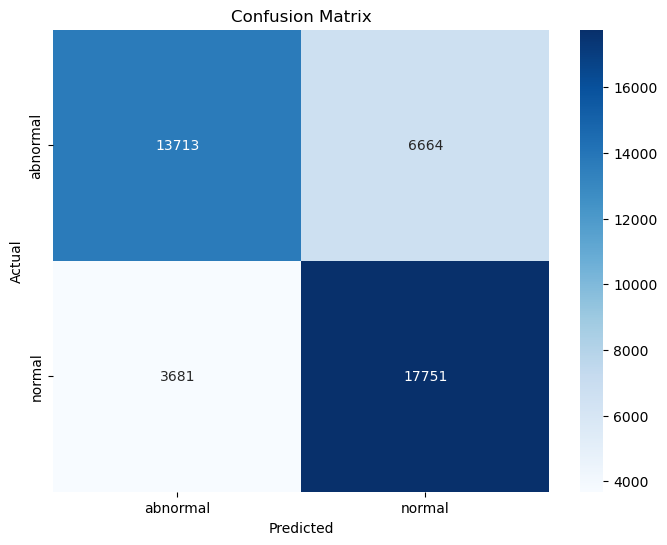

In [ ]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_label,y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['abnormal', 'normal'], yticklabels=['abnormal', 'normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# import os
# import pandas as pd

# def calculate_center(left, top, w, h):
#     center_x = left + w / 2
#     center_y = top - h / 2
#     return center_x, center_y

# def process_folder(folder_path):
#     # Loop through each file in the folder
#     for file_name in os.listdir(folder_path):
#         if file_name.endswith('.csv'):
#             file_path = os.path.join(folder_path, file_name)
#             # Read the CSV file
#             df = pd.read_csv(file_path)
#             # Calculate center for each row
#             center_x_values = []
#             center_y_values = []
#             for index, row in df.iterrows():
#                 center_x, center_y = calculate_center(row['left'], row['top'], row['w'], row['h'])
#                 center_x_values.append(center_x)
#                 center_y_values.append(center_y)
#             # Append the center values as new columns
#             df['center_x'] = center_x_values
#             df['center_y'] = center_y_values
#             # Save the modified DataFrame back to the original CSV file
#             df.to_csv(file_path, index=False)

# # Example usage:
# folder_path = '/Users/loriyaharsh/Desktop/HARSH/SAME_6/ML/project/code_and_datasets/sptio-temporal-dataset/dataset/data'
# process_folder(folder_path)


In [ ]:
# import pandas as pd
# import cv2

# def draw_connecting_lines(image_path, csv_path, output_image_path):
#     # Read the image
#     img = cv2.imread(image_path)

#     # Read the CSV file
#     df = pd.read_csv(csv_path)

#     # Convert center coordinates to integer
#     df['center_x'] = df['center_x'].astype(int)
#     df['center_y'] = df['center_y'].astype(int)

#     # Plot connecting lines and mark points
#     for i in range(len(df) - 1):
#         point1 = (df.iloc[i]['center_x'], df.iloc[i]['center_y'])
#         point2 = (df.iloc[i+1]['center_x'], df.iloc[i+1]['center_y'])
#         cv2.line(img, point1, point2, (0, 0, 255), 2)

#     # Mark the first point in blue
#     first_point = (df.iloc[0]['center_x'], df.iloc[0]['center_y'])
#     cv2.circle(img, first_point, 5, (255, 0, 0), -1)

#     # Mark the last point in yellow
#     last_point = (df.iloc[-1]['center_x'], df.iloc[-1]['center_y'])
#     cv2.circle(img, last_point, 5, (0, 255, 255), -1)

#     # Save the annotated image
#     cv2.imwrite(output_image_path, img)

# # Example usage:
# image_path = 'sample10.jpg'
# csv_path = 'data/normal_11_10.csv'
# output_image_path = 'output_image.jpg'
# draw_connecting_lines(image_path, csv_path, output_image_path)


In [ ]:
import pandas as pd
import cv2

def draw_connecting_lines(image_path, csv_path, img, offset_x, offset_y):
    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Convert center coordinates to integer
    df['center_x'] = df['center_x'].astype(int)
    df['center_y'] = df['center_y'].astype(int)

    # Plot connecting lines and mark points
    for i in range(len(df) - 1):
        point1 = (df.iloc[i]['center_x'] + offset_x, df.iloc[i]['center_y'] + offset_y)
        point2 = (df.iloc[i+1]['center_x'] + offset_x, df.iloc[i+1]['center_y'] + offset_y)
        cv2.line(img, point1, point2, (0, 0, 255), 2)

    # Mark the first point in blue
    first_point = (df.iloc[0]['center_x'] + offset_x, df.iloc[0]['center_y'] + offset_y)
    cv2.circle(img, first_point, 5, (255, 0, 0), -1)

    # Mark the last point in yellow
    last_point = (df.iloc[-1]['center_x'] + offset_x, df.iloc[-1]['center_y'] + offset_y)
    cv2.circle(img, last_point, 5, (0, 255, 255), -1)

# Example usage:
path = 'data/'

# Read the base image
base_image = cv2.imread('sample10.jpg')

# Set initial offsets for placing points from different files
offset_x = 0
offset_y = 0

for filename in missing_file:
    if filename.startswith('abnormal_12'):
        draw_connecting_lines(path + filename.replace('.csv', '.jpg'), path + filename, base_image, offset_x, offset_y)
        # Adjust offsets for the next file
        offset_x += 50  # Adjust as needed
        offset_y += 50  # Adjust as needed

# Save the final annotated image
cv2.imwrite('combined_abnormal_12_image.jpg', base_image)


True